# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find_all('tr', class_ = 'data-row')

In [6]:
print(table)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data_mars = []


# Loop through the scraped data to create a list of rows
for row in table :
    row_data = row.find_all('td')
    data_mars.append([col.text for col in row_data])

data_mars

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# create list of columns name

col_names_list = ['id', 'terrestrial_date', 'sol' , 'ls' , 'month', 'min_temp' , 'pressure' ]

In [9]:
# insert columns name in the list od datamars

data_mars.insert(0, col_names_list)

data_mars

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(data_mars)

# set the 1st crow as header

mars_df.columns = mars_df.iloc[0]

# drop the 1st row

mars_df = mars_df[1 : ]


In [11]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

0
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
mars_df = mars_df.astype({
                'terrestrial_date' : 'datetime64[ns]'
                ,'sol' : 'int32'
                , 'ls' : 'int32'
                , 'month' : 'int32'
                , 'min_temp' : 'float64'
                , 'pressure' : 'float64'
                })



In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

0
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
months_len = len(mars_df['month'].unique())
months_len

12

In [16]:
# 2. How many sols (Martian days) worth of data are there?
sols_len = len(mars_df['sol'].unique())
sols_len

1867

In [17]:
# 3. What is the average minimum temperature by month?

temp_avg = mars_df.groupby(['month'])['min_temp'].mean()

temp_avg


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average minimum temperature by month')

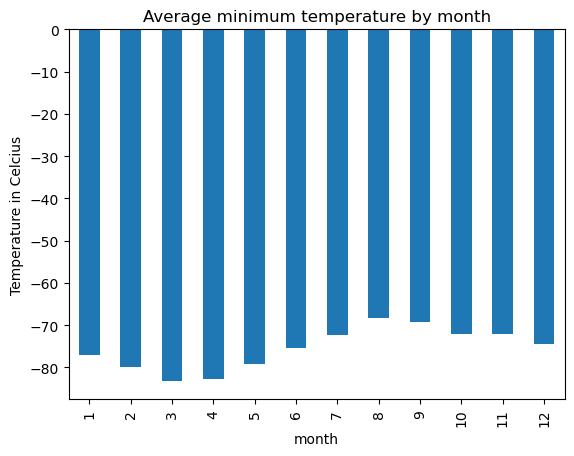

In [18]:
# Plot the average minimum temperature by month

ax = temp_avg.plot(kind = 'bar')
ax.set_ylabel('Temperature in Celcius')
ax.set_title('Average minimum temperature by month')

Text(0.5, 1.0, 'Average minimum temperature by month')

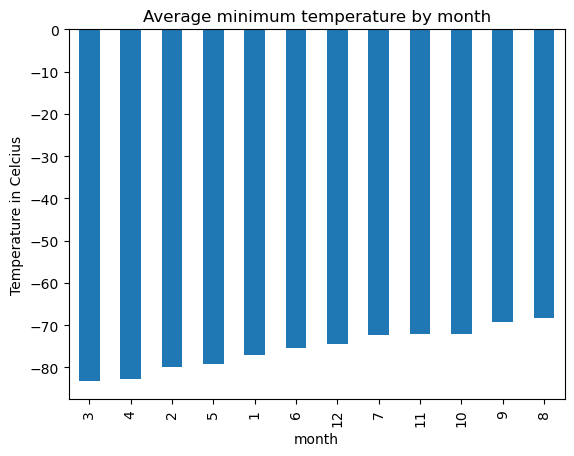

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


temp_avg_sorted = temp_avg.sort_values()

ay = temp_avg_sorted.plot(kind = 'bar')
ay.set_ylabel('Temperature in Celcius')
ay.set_title('Average minimum temperature by month')

In [20]:
# 4. What is the average pressure by month?
press_avg = mars_df.groupby(['month'])['pressure'].mean()

press_avg

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'average pressure by month')

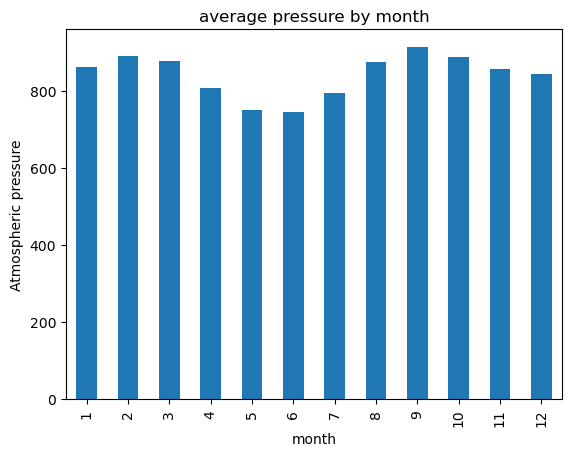

In [21]:
# Plot the average pressure by month

ax_p = press_avg.plot(kind = 'bar')
ax_p.set_ylabel('Atmospheric pressure')
ax_p.set_title('average pressure by month')

Text(0.5, 1.0, 'average pressure by month')

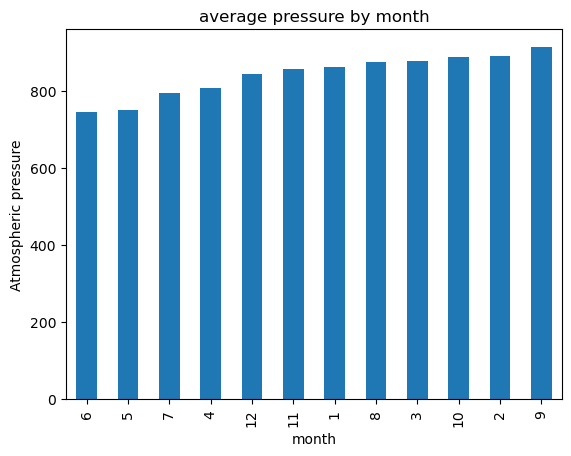

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

press_sorted = press_avg.sort_values()

ay_p = press_sorted.plot(kind = 'bar')
ay_p.set_ylabel('Atmospheric pressure')
ay_p.set_title('average pressure by month')

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?


In [23]:
## create DF (mars day) to calculate days difference between 2 months' 1st day

mars_day = mars_df.copy()

## create a column with concatenation of month + year 

mars_day['terrestrial_date'] = pd.to_datetime(mars_day['terrestrial_date'])
mars_day['year'] = mars_day['terrestrial_date'].dt.year

mars_day['month_year'] = mars_day['month'].astype(str) + '-' + mars_day['year'].astype(str)

mars_day.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure,year,month_year
1,2,2012-08-16,10,155,6,-75.0,739.0,2012,6-2012
2,13,2012-08-17,11,156,6,-76.0,740.0,2012,6-2012
3,24,2012-08-18,12,156,6,-76.0,741.0,2012,6-2012
4,35,2012-08-19,13,157,6,-74.0,732.0,2012,6-2012
5,46,2012-08-20,14,157,6,-74.0,740.0,2012,6-2012


In [24]:
## extract for each month_year the first day
## aggregate to have the 1st day as the min 'sol" each time

day1 = mars_day.groupby(['month_year'])['sol'].min()
# x

In [29]:
## take 1 month (1) and calculate how many days are needed to be back
## make an average between 2 orbits 

orbit_1 = (day1.iloc[1] - day1.iloc[0]) 
orbit_2 = (day1.iloc[2] - day1.iloc[1])
orbit_3 = (day1.iloc[4] - day1.iloc[3]) 
orbit_4 = (day1.iloc[5] - day1.iloc[4])

orbit_avg = (orbit_1 + orbit_2 + orbit_3 + orbit_4)/4

print(f'number of days for orbit 1 : { orbit_1} days')
print(f'number of days for orbit 2  : { orbit_2} days')
print(f'number of days for orbit 1 : { orbit_3} days')
print(f'number of days for orbit 2  : { orbit_4} days')
print(f'number of days (average between 2 orbits)  : { orbit_avg} days')

number of days for orbit 1 : 668 days
number of days for orbit 2  : 669 days
number of days for orbit 1 : 668 days
number of days for orbit 2  : 669 days
number of days (average between 2 orbits)  : 668.5 days


Text(0.5, 1.0, 'Minimum Temperature over time')

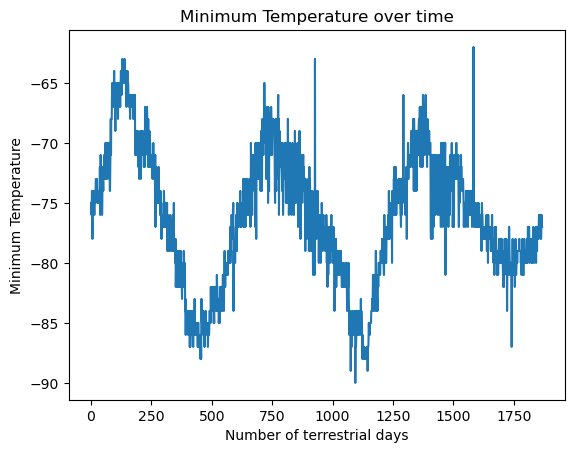

In [26]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

temp_daily_x = mars_df['min_temp']
ax = temp_daily_x.plot(kind='line')
ax.set_xlabel('Number of terrestrial days')
ax.set_ylabel('Minimum Temperature')
ax.set_title('Minimum Temperature over time')

#### Minimum Temperature

the minimum temperature on mars is  observed during Month 3 when it reaches - -83.307292 degrees C
the highest average temparature is observed during Month 8 when it reaches - -68.382979 degrees C

#### Atmospheric Pressure

the minimum pressure on mars is  observed during Month 6 when it reaches a value of 745.054422
the highest average pressure is observed during Month 9 when it reaches a value of 913.305970 

#### Year Length

the year lenth is 668.5 earth days
it has beed calculated on the bases of the 1st day of a random month (month 1 in our case)
on this basis we calculated the number of sols needed for the month to come back
we did the calculation 4 time to calculate an average

I know that the science says 687 days : but would you believe in science instead of me????
the difference between me and science is 2%

i think that this is due to the fact the data is not complete : we don't have an observation for each day : 
we have 1867 observations so we were supposed to have a maximum date of 2017-09-26, but we have a maximunm date of 2018-02-27, so NASA was not doing the job on a daily basis.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
path = 'mars_data.csv'
mars_df.to_csv(path)

In [30]:
browser.quit()